<a href="https://colab.research.google.com/github/toccht/CSCI-4962/blob/main/hw5/CSCI4962-HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSCI-4962 Homework 5
Author: Trevor Tocchet

In [1]:
pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-uax39kcc
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-uax39kcc


In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import glob
import imageio
import os
import PIL
import time
from IPython import display
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D, Flatten, Dense, Activation, Dropout

In [3]:
# plotting helper function
def accuracy_plot(hist):
  plt.plot(hist.history['accuracy'])
  plt.plot(hist.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

def loss_plot(hist):
  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

# Image Data
https://www.cs.toronto.edu/~kriz/cifar.html

Training data shape = (50000, 32, 32, 3)
Testing data shape =  (10000, 32, 32, 3)

First 12 images in the training set:


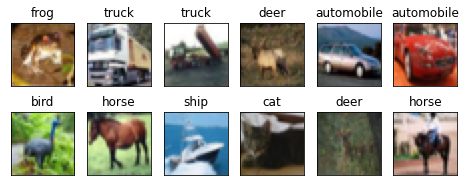

In [4]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

class_labels = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

print("Training data shape =", x_train.shape)
print("Testing data shape = ", x_test.shape)
print("\nFirst 12 images in the training set:")

fig = plt.figure(figsize=(8,3))
for i in range(12):
  fig.add_subplot(2, 6, 1 + i, xticks=[], yticks=[])
  plt.imshow(x_train[i])
  plt.title(class_labels[y_train[i][0]])
plt.show()

Each data point is a 32 x 32 color image. The first 1024 entries contain the red channel values, the next 1024 are green, and the last 1024 are blue. We will have to normalize/scale the data.

Each label is in the range of 0-9 where it corresponds to the array index in the class_labels array. We will not have to do integer/ordinal encoding on the class labels (each unique category value is assigned an integer value), but we will have to use hot encoding.

In [5]:
# normalize the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# CNN Model

In [6]:
def cnn_model():
  model = Sequential()
  model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32,32,3)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(10, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

Epoch 1/10
1563/1563 [==============================] - 15s 8ms/step - loss: 1.4566 - accuracy: 0.4837 - val_loss: 1.1782 - val_accuracy: 0.5896
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1078 - accuracy: 0.6135 - val_loss: 1.0693 - val_accuracy: 0.6312
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9821 - accuracy: 0.6597 - val_loss: 0.9888 - val_accuracy: 0.6559
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9058 - accuracy: 0.6866 - val_loss: 0.9444 - val_accuracy: 0.6788
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8492 - accuracy: 0.7075 - val_loss: 0.9546 - val_accuracy: 0.6709
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8091 - accuracy: 0.7214 - val_loss: 0.9296 - val_accuracy: 0.6888
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7674 - accuracy: 0.7367 - val_loss: 0.9206 - val_ac

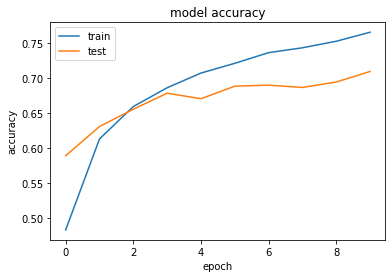

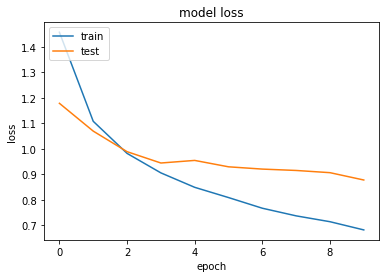


Test accuracy: 0.7098000049591064


In [7]:
model = cnn_model()
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))
accuracy_plot(history)
loss_plot(history)
_, test_accuracy = model.evaluate(x_test,  y_test, verbose=0)
print('\nTest accuracy:', test_accuracy)

I've trained the model on 50 epochs and it showed overfitting. Some regularization techniques like dropout can be used to increase the accuracy of the model. The model scored ~68% accuracy.

# VGG Model
I tried using the built in VGG16 model that is included in Keras but it was taking a long time to train with a small accuracy, so I am using a 3-block VGG model instead. If we were only intrested in making predictions, we could use the VGG16 pre-trained model from keras to make accurate predictions.
* https://towardsdatascience.com/how-to-use-a-pre-trained-model-vgg-for-image-classification-8dd7c4a4a517
* https://medium.com/analytics-vidhya/introduction-to-computer-vision-with-baseline-vgg-blocks-on-the-cifar-10-dataset-731d19439922
* https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c

In [8]:
def vgg_model():
  model = Sequential()
  
  model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (32,32,3)))
  model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
  model.add(MaxPooling2D((2,2)))

  model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
  model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
  model.add(MaxPooling2D((2,2)))

  model.add(Conv2D(256,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
  model.add(Conv2D(256,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
  model.add(MaxPooling2D((2,2)))
  model.add(MaxPooling2D((2,2)))

  model.add(Flatten())
  model.add(Dense(256, activation = 'relu', kernel_initializer = 'he_uniform'))
  model.add(Dense(10, activation = 'softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

Epoch 1/10
1563/1563 [==============================] - 37s 23ms/step - loss: 1.4016 - accuracy: 0.4899 - val_loss: 1.0323 - val_accuracy: 0.6344
Epoch 2/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.8623 - accuracy: 0.6970 - val_loss: 0.7801 - val_accuracy: 0.7304
Epoch 3/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.6544 - accuracy: 0.7748 - val_loss: 0.7004 - val_accuracy: 0.7579
Epoch 4/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.5200 - accuracy: 0.8185 - val_loss: 0.6595 - val_accuracy: 0.7761
Epoch 5/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.4226 - accuracy: 0.8520 - val_loss: 0.6649 - val_accuracy: 0.7744
Epoch 6/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.3401 - accuracy: 0.8811 - val_loss: 0.7287 - val_accuracy: 0.7824
Epoch 7/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.2810 - accuracy: 0.9028 - val_loss: 0.8215 -

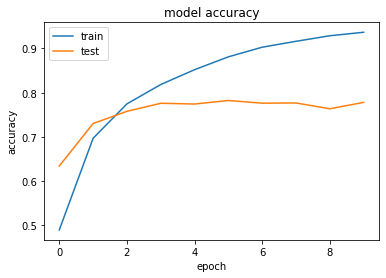

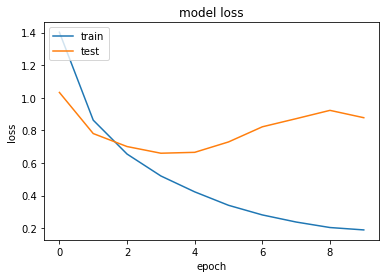


Test accuracy: 0.7781000137329102


In [9]:
model = vgg_model()
history = model.fit(x_train, y_train, batch_size = 32, epochs=10, validation_data=(x_test, y_test))
accuracy_plot(history)
loss_plot(history)
_, test_accuracy = model.evaluate(x_test,  y_test, verbose=0)
print('\nTest accuracy:', test_accuracy)

The VGG model performs better than the basic vanilla CNN model because VGG is a specific deep convolutional network.

# Data Augmentation
Using image rotation to diversify the training set.

In [10]:
from keras.preprocessing.image import ImageDataGenerator

# horizontal flip generator
datagen = ImageDataGenerator(horizontal_flip = True)
datagen.fit(x_train)

# datagen iterator
train = datagen.flow(x_train, y_train, batch_size = 32)

model = cnn_model()
history = model.fit(train, batch_size=32, epochs = 10, validation_data=(x_test, y_test))
_, test_accuracy = model.evaluate(x_test,  y_test, verbose=0)
print('\nTest accuracy:', test_accuracy)

Epoch 1/10
1563/1563 [==============================] - 14s 8ms/step - loss: 1.4673 - accuracy: 0.4745 - val_loss: 1.2062 - val_accuracy: 0.5745
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1320 - accuracy: 0.6085 - val_loss: 1.1157 - val_accuracy: 0.6082
Epoch 3/10
1563/1563 [==============================] - 13s 9ms/step - loss: 1.0145 - accuracy: 0.6486 - val_loss: 1.0605 - val_accuracy: 0.6315
Epoch 4/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.9521 - accuracy: 0.6741 - val_loss: 0.9395 - val_accuracy: 0.6804
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9010 - accuracy: 0.6905 - val_loss: 0.9186 - val_accuracy: 0.6849
Epoch 6/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.8625 - accuracy: 0.7019 - val_loss: 0.9038 - val_accuracy: 0.6888
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8339 - accuracy: 0.7134 - val_loss: 0.8811 - val_ac

The accuracy increases when using data augmentation on the basic vanilla CNN model.

# Variational Autoencoder (VAE)
* https://www.tensorflow.org/tutorials/generative/cvae
* https://olaralex.com/variational-auto-encoder-with-cifar-10-2/

In [11]:
def preprocess_images(images):
  images = images.reshape((images.shape[0], 32, 32, 3)) / 255.
  return np.where(images > .5, 1.0, 0.0).astype('float32')

(train_images, _), (test_images, _) = tf.keras.datasets.cifar10.load_data()

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)

train_size = 50000
batch_size = 32
test_size = 10000

train_dataset = (tf.data.Dataset.from_tensor_slices(train_images)
                 .shuffle(train_size).batch(batch_size))
test_dataset = (tf.data.Dataset.from_tensor_slices(test_images)
                .shuffle(test_size).batch(batch_size))

In [12]:
class CVAE(tf.keras.Model):
  """Convolutional variational autoencoder."""

  def __init__(self, latent_dim):
    super(CVAE, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(32, 32, 3)),
            tf.keras.layers.Conv2D(
                filters=64, kernel_size=4, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(
                filters=128, kernel_size=4, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            # No activation
            tf.keras.layers.Dense(latent_dim + latent_dim),
        ]
    )

    self.decoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(latent_dim,)),
            tf.keras.layers.Dense(units=8*8*32, activation=tf.nn.relu),
            tf.keras.layers.Reshape(target_shape=(8, 8, 32)),
            tf.keras.layers.Conv2DTranspose(
                filters=128, kernel_size=4, strides=2, padding='same',
                activation='relu'),
            tf.keras.layers.Conv2DTranspose(
                filters=64, kernel_size=4, strides=2, padding='same',
                activation='relu'),
            # No activation
            tf.keras.layers.Conv2DTranspose(
                filters=3, kernel_size=4, strides=1, padding='same'),
        ]
    )

  @tf.function
  def sample(self, eps=None):
    if eps is None:
      eps = tf.random.normal(shape=(100, self.latent_dim))
    return self.decode(eps, apply_sigmoid=True)

  def encode(self, x):
    mean, logvar = tf.split(self.encoder(x), num_or_size_splits=2, axis=1)
    return mean, logvar

  def reparameterize(self, mean, logvar):
    eps = tf.random.normal(shape=mean.shape)
    return eps * tf.exp(logvar * .5) + mean

  def decode(self, z, apply_sigmoid=False):
    logits = self.decoder(z)
    if apply_sigmoid:
      probs = tf.sigmoid(logits)
      return probs
    return logits

In [13]:
optimizer = tf.keras.optimizers.Adam(1e-4)


def log_normal_pdf(sample, mean, logvar, raxis=1):
  log2pi = tf.math.log(2. * np.pi)
  return tf.reduce_sum(
      -.5 * ((sample - mean) ** 2. * tf.exp(-logvar) + logvar + log2pi),
      axis=raxis)


def compute_loss(model, x):
  mean, logvar = model.encode(x)
  z = model.reparameterize(mean, logvar)
  x_logit = model.decode(z)
  cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_logit, labels=x)
  logpx_z = -tf.reduce_sum(cross_ent, axis=[1, 2, 3])
  logpz = log_normal_pdf(z, 0., 0.)
  logqz_x = log_normal_pdf(z, mean, logvar)
  return -tf.reduce_mean(logpx_z + logpz - logqz_x)


@tf.function
def train_step(model, x, optimizer):
  """Executes one training step and returns the loss.

  This function computes the loss and gradients, and uses the latter to
  update the model's parameters.
  """
  with tf.GradientTape() as tape:
    loss = compute_loss(model, x)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

In [14]:
epochs = 10
# set the dimensionality of the latent space to a plane for visualization later
latent_dim = 3
num_examples_to_generate = 16

# keeping the random vector constant for generation (prediction) so
# it will be easier to see the improvement.
random_vector_for_generation = tf.random.normal(
    shape=[num_examples_to_generate, latent_dim])
model = CVAE(latent_dim)

In [15]:
def generate_and_save_images(model, epoch, test_sample):
  mean, logvar = model.encode(test_sample)
  z = model.reparameterize(mean, logvar)
  predictions = model.sample(z)
  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(predictions[i, :, :, 0], cmap='gray')
    plt.axis('off')

  # tight_layout minimizes the overlap between 2 sub-plots
  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

Epoch: 10, Test set ELBO: -1447.5689697265625, time elapse for current epoch: 18.8781259059906


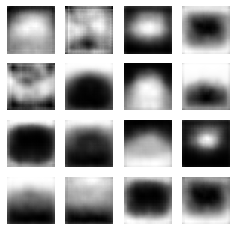

In [16]:
# Pick a sample of the test set for generating output images
assert batch_size >= num_examples_to_generate
for test_batch in test_dataset.take(1):
  test_sample = test_batch[0:num_examples_to_generate, :, :, :]

generate_and_save_images(model, 0, test_sample)

for epoch in range(1, epochs + 1):
  start_time = time.time()
  for train_x in train_dataset:
    train_step(model, train_x, optimizer)
  end_time = time.time()

  loss = tf.keras.metrics.Mean()
  for test_x in test_dataset:
    loss(compute_loss(model, test_x))
  elbo = -loss.result()
  display.clear_output(wait=False)
  print('Epoch: {}, Test set ELBO: {}, time elapse for current epoch: {}'
        .format(epoch, elbo, end_time - start_time))
  generate_and_save_images(model, epoch, test_sample)

(-0.5, 287.5, 287.5, -0.5)

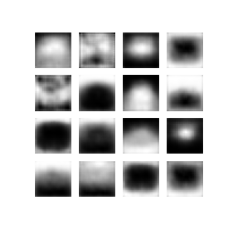

In [17]:
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

plt.imshow(display_image(epoch))
plt.axis('off')  # Display images


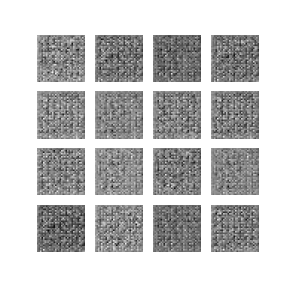

In [18]:
import tensorflow_docs.vis.embed as embed

anim_file = 'cvae.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

embed.embed_file(anim_file)

# Generative Adversarial Networks (GANs)
* https://www.tensorflow.org/tutorials/generative/dcgan

In [19]:
(train_images, train_labels), (_, _) = tf.keras.datasets.cifar10.load_data()
train_images = train_images.reshape(train_images.shape[0], 32, 32, 3).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize the images to [-1, 1]
BUFFER_SIZE = 50000
BATCH_SIZE = 256
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [20]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(8*8*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((8, 8, 256)))
    assert model.output_shape == (None, 8, 8, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 8, 8, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 16, 16, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    print(model.output_shape)
    assert model.output_shape == (None, 32, 32, 3)

    return model

def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[32, 32, 3]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model
  
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

(None, 32, 32, 3)


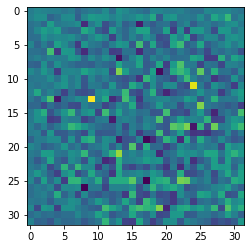

In [21]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0])

In [22]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[0.00236722]], shape=(1, 1), dtype=float32)


In [23]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [24]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [25]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [26]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as you go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5)
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

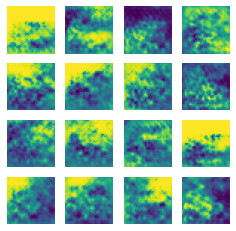

In [27]:
train(train_dataset, EPOCHS)


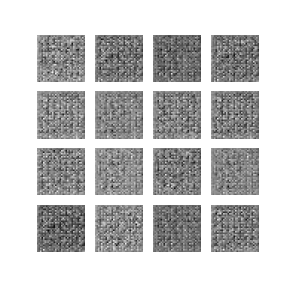

In [28]:
import tensorflow_docs.vis.embed as embed

# Display a single image using the epoch number
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

display_image(EPOCHS)

anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

embed.embed_file(anim_file)

# More Resources
* https://towardsdatascience.com/convolutional-neural-networks-for-beginners-using-keras-and-tensorflow-2-c578f7b3bf25